In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# importing ml models to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
# loading the dataset
users_behavior=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CLIENTS/gulom1987/5th/users_behavior project7.csv")

In [ ]:
# exploring the data
users_behavior.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [ ]:
# checking for number of rows and column
users_behavior.shape

(3214, 5)

In [ ]:
# checking for null values
missing_values = users_behavior.isnull().sum()
print(missing_values)

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


In [ ]:
# checking info about the data especially about data type
users_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [ ]:
# Convert numeric columns to integers and round off
users_behavior['calls'] = users_behavior['calls'].astype(int)
users_behavior['minutes'] = users_behavior['minutes'].astype(int)
users_behavior['messages'] = users_behavior['messages'].astype(int)
users_behavior['mb_used'] = users_behavior['mb_used'].astype(int)

# Display the modified DataFrame
display(users_behavior.head())

,calls,minutes,messages,mb_used,is_ultra
0,40,311,83,19915,0
1,85,516,56,22696,0
2,77,467,86,21060,0
3,106,745,81,8437,1
4,66,418,1,14502,0


In [ ]:
# Confirm info about the data especially about data type (all in int type)
users_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   calls     3214 non-null   int64
 1   minutes   3214 non-null   int64
 2   messages  3214 non-null   int64
 3   mb_used   3214 non-null   int64
 4   is_ultra  3214 non-null   int64
dtypes: int64(5)
memory usage: 125.7 KB


In [ ]:
# Check for duplicated rows
duplicates = users_behavior.duplicated()

# Display the duplicated rows (if any)
duplicated_rows = users_behavior[duplicates]
print(duplicated_rows)

Empty DataFrame
Columns: [calls, minutes, messages, mb_used, is_ultra]
Index: []


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>



---



---



#Data Preparation For Machine Learning




---



---



# splitting data into features and target


In [ ]:
# Features (X): calls, minutes, messages, mb_used
X = users_behavior[['calls', 'minutes', 'messages', 'mb_used']]

# Target variable (y): is_ultra
y = users_behavior['is_ultra']

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good!

</div>

# spliting data into training and test set


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, if you use cross-validation, we can skip the validation set
    

</div>

# Scaling

In [ ]:
# Scaling features after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div class="alert alert-danger">
<b>Reviewer's comment  NEED TO FIX</b>

To avoid data leakage scaling should be done after splitting the data into train, validation and test.
    
If you use cross-validation, scaling should be applied in each fold separately (e.g. using [pipelines](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html))

</div>

**Correction** : Now the scaling is applied after the train test split to prevent data leakage and X_train_scaled data is used for model selection and hyperparameters tuning and X_test_scaled data is used for final model building.

In [ ]:
X_train_scaled

array([[-1.30494083, -1.43126217, -0.8336971 , -0.17540597],
       [ 1.01437991,  1.36721778,  1.06054873,  0.4035934 ],
       [-1.60615132, -1.54217754, -0.8336971 , -1.61688003],
       ...,
       [-0.70251986, -0.68045048, -0.99841413, -0.43213585],
       [ 0.2613537 , -0.12587366,  0.81347319, -0.15779634],
       [ 0.47220104,  0.41590524, -0.36699885,  0.53295136]])

# Applying cross validation of 5 folds with all the models with default parameters for best model selection

In [ ]:
lr = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
bagg = BaggingClassifier()
rfr = RandomForestClassifier()
adab = AdaBoostClassifier()
gbr = GradientBoostingClassifier()
nb1 = GaussianNB()
xg = XGBClassifier()

In [ ]:
# List of classifiers
classifiers = [lr, svc, knn, dt, bagg, rfr, adab, gbr, nb1, xg]

# Dictionary to store cross-validation scores
cv_scores_dict = {}

# Train and evaluate each classifier
for clf in classifiers:

    # Evaluate the model using cross-validation on the training set
    cross_val_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores_dict[clf.__class__.__name__] = cross_val_scores
    print(f"Cross-Validation Scores for {clf.__class__.__name__}: {cross_val_scores}")
    print(f"Mean Cross-Validation Accuracy for {clf.__class__.__name__}: {cross_val_scores.mean():.4f}")
    print("-------------------------------")

Cross-Validation Scores for LogisticRegression: [0.74174757 0.76070039 0.72178988 0.74708171 0.74513619]
Mean Cross-Validation Accuracy for LogisticRegression: 0.7433
-------------------------------
Cross-Validation Scores for SVC: [0.79417476 0.82490272 0.77042802 0.82684825 0.78015564]
Mean Cross-Validation Accuracy for SVC: 0.7993
-------------------------------
Cross-Validation Scores for KNeighborsClassifier: [0.77087379 0.81128405 0.77042802 0.807393   0.75486381]
Mean Cross-Validation Accuracy for KNeighborsClassifier: 0.7830
-------------------------------
Cross-Validation Scores for DecisionTreeClassifier: [0.70291262 0.73540856 0.70817121 0.71984436 0.73346304]
Mean Cross-Validation Accuracy for DecisionTreeClassifier: 0.7200
-------------------------------
Cross-Validation Scores for BaggingClassifier: [0.79417476 0.78404669 0.76459144 0.80155642 0.77042802]
Mean Cross-Validation Accuracy for BaggingClassifier: 0.7830
-------------------------------
Cross-Validation Scores f

<div class="alert alert-danger">
<b>Reviewer's comment NEED TO FIX</b>

The test set should be used only once: to evaluate the final model, before that to compare different models and/or versions of the same model with different hyperparameters you need to use either cross-validation or the validation set

</div>

**Correction**: Now the test set which is "X_test_scaled" is neither used for the model selection process nor for the hyperparameters tuning process. Now only " Mean CV Score " is calculated by using X_train_scaled and y_tarin data. In the end we evaluated our best selected model with X_test_scaled data.

# Creating data frame of all algorithums accuracies

In [ ]:
# Create a dictionary to store the results
results_dict = {
    'Classifier': [],
    'Mean_CV_Accuracy': []
}

# Fill the dictionary with results
for clf_name, scores in cv_scores_dict.items():
    mean_cv_accuracy = scores.mean()

    results_dict['Classifier'].append(clf_name)
    results_dict['Mean_CV_Accuracy'].append(mean_cv_accuracy)

# Create a DataFrame from the results
results_df = pd.DataFrame(results_dict)

# Print the DataFrame
display(results_df)

,Classifier,Mean_CV_Accuracy
0,LogisticRegression,0.743291
1,SVC,0.799302
2,KNeighborsClassifier,0.782969
3,DecisionTreeClassifier,0.719960
4,BaggingClassifier,0.782959
5,RandomForestClassifier,0.793463
6,AdaBoostClassifier,0.793469
7,GradientBoostingClassifier,0.803967
8,GaussianNB,0.784128
9,XGBClassifier,0.796189


# Classifier Accuracy Comparison

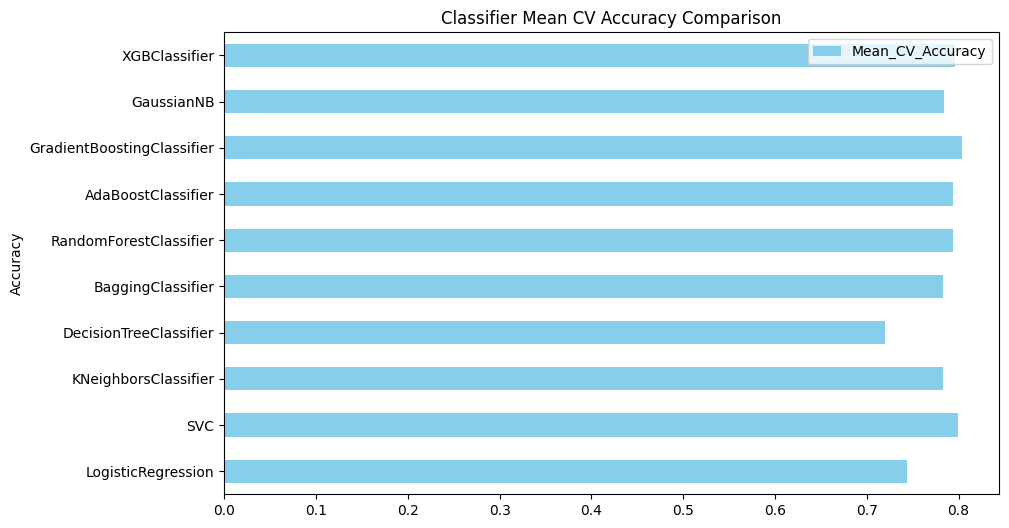

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
results_df.plot(kind='barh', x='Classifier', y=['Mean_CV_Accuracy'], ax=ax, color=['skyblue'])
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Mean CV Accuracy Comparison')

# Move the legend to the upper left corner
ax.legend(loc='best')

# Display the plot
plt.show()

In [ ]:
# Sort the DataFrame by Accuracy and Mean_CV_Accuracy in descending order
results_df_sorted = results_df.sort_values(by=['Mean_CV_Accuracy'], ascending=False)

# Print the sorted DataFrame
display(results_df_sorted)

,Classifier,Mean_CV_Accuracy
7,GradientBoostingClassifier,0.803967
1,SVC,0.799302
9,XGBClassifier,0.796189
6,AdaBoostClassifier,0.793469
5,RandomForestClassifier,0.793463
8,GaussianNB,0.784128
2,KNeighborsClassifier,0.782969
4,BaggingClassifier,0.782959
0,LogisticRegression,0.743291
3,DecisionTreeClassifier,0.719960


# Conclusions

**Best 5 Classifiers we will use include:**

- GradientBoostingClassifier
- SVC
- RandomForestClassifier
- AdaBoostClassifier
- XGBClassifier

**We are ignoring the Bagging,GaussianNB and KNN classifier because their mean CV Accuracy is not higher comparitively with the best performing algorithums**

- **Bagging and Boosting algorithums perform better than other algorithums. We will consider 5 best performing classifiers and hypertune them furthur for the best hyperparameters by using Randomized search CV.**
- **We are not using Grid search CV because it will take a lot of time to run the code.**



---

---





# Applying RandomizedSearchCV to tune for the best hyper-parameters for model selection




---



---



# 1. GradientBoostingClassifier Hyperparameter tuning

In [ ]:
# Define the model (GradientBoostingClassifier)
model = GradientBoostingClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train_scaled, y_train)  # Use the scaled training data for hyperparameter tuning

# Get the best hyperparameters
best_params_random = random_search.best_params_

# Train the model with the best hyperparameters using the scaled training data
best_model_random = GradientBoostingClassifier(**best_params_random)
best_model_random.fit(X_train_scaled, y_train)  # Use the scaled training data for model training

# Cross-validation scores
cross_val_scores_random = cross_val_score(best_model_random, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Best Hyperparameters (Randomized Search): {best_params_random}")
print(f"Cross-Validation Scores for Randomized Search: {cross_val_scores_random}")
print(f"Mean Cross-Validation Accuracy for Randomized Search: {cross_val_scores_random.mean():.4f}")

Best Hyperparameters (Randomized Search): {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.1}
Cross-Validation Scores for Randomized Search: [0.80776699 0.84435798 0.78599222 0.80933852 0.77431907]
Mean Cross-Validation Accuracy for Randomized Search: 0.8044


# 2. RandomForestClassifier Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the model (RandomForestClassifier)
model_rf = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV instead of GridSearchCV for RandomForestClassifier
random_search_rf = RandomizedSearchCV(model_rf, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='accuracy')
random_search_rf.fit(X_train_scaled, y_train)  # Use the scaled training data for hyperparameter tuning

# Get the best hyperparameters for RandomForestClassifier
best_params_random_rf = random_search_rf.best_params_

# Train the model with the best hyperparameters using the scaled training data
best_model_random_rf = RandomForestClassifier(**best_params_random_rf)
best_model_random_rf.fit(X_train_scaled, y_train)  # Use the scaled training data for model training

# Cross-validation scores for RandomForestClassifier
cross_val_scores_random_rf = cross_val_score(best_model_random_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Best Hyperparameters (Randomized Search - RandomForest): {best_params_random_rf}")
print(f"Cross-Validation Scores for Randomized Search (RandomForest): {cross_val_scores_random_rf}")
print(f"Mean Cross-Validation Accuracy for Randomized Search (RandomForest): {cross_val_scores_random_rf.mean():.4f}")

Best Hyperparameters (Randomized Search - RandomForest): {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 15, 'criterion': 'entropy'}
Cross-Validation Scores for Randomized Search (RandomForest): [0.80582524 0.84241245 0.77431907 0.82490272 0.78599222]
Mean Cross-Validation Accuracy for Randomized Search (RandomForest): 0.8067


# 3. AdaBoostClassifier Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Define the model (AdaBoostClassifier)
model_ada = AdaBoostClassifier()

# Define the hyperparameters to tune
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Use RandomizedSearchCV instead of GridSearchCV for AdaBoost
random_search_ada = RandomizedSearchCV(model_ada, param_distributions=param_grid_ada, n_iter=10, cv=5, scoring='accuracy')
random_search_ada.fit(X_train_scaled, y_train)  # Use the scaled training data for hyperparameter tuning

# Get the best hyperparameters for AdaBoost
best_params_random_ada = random_search_ada.best_params_

# Train the model with the best hyperparameters using the scaled training data
best_model_random_ada = AdaBoostClassifier(**best_params_random_ada)
best_model_random_ada.fit(X_train_scaled, y_train)  # Use the scaled training data for model training

# Cross-validation scores for AdaBoost
cross_val_scores_random_ada = cross_val_score(best_model_random_ada, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Best Hyperparameters (Randomized Search - AdaBoost): {best_params_random_ada}")
print(f"Cross-Validation Scores for Randomized Search (AdaBoost): {cross_val_scores_random_ada}")
print(f"Mean Cross-Validation Accuracy for Randomized Search (AdaBoost): {cross_val_scores_random_ada.mean():.4f}")

Best Hyperparameters (Randomized Search - AdaBoost): {'n_estimators': 100, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}
Cross-Validation Scores for Randomized Search (AdaBoost): [0.78252427 0.81906615 0.76848249 0.80933852 0.78015564]
Mean Cross-Validation Accuracy for Randomized Search (AdaBoost): 0.7919


# 4. XGBClassifier Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the model (XGBClassifier)
model_xgb = XGBClassifier()

# Define the hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Use RandomizedSearchCV instead of GridSearchCV for XGBClassifier
random_search_xgb = RandomizedSearchCV(model_xgb, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring='accuracy')
random_search_xgb.fit(X_train_scaled, y_train)  # Use the scaled training data for hyperparameter tuning

# Get the best hyperparameters for XGBClassifier
best_params_random_xgb = random_search_xgb.best_params_

# Train the model with the best hyperparameters using the scaled training data
best_model_random_xgb = XGBClassifier(**best_params_random_xgb)
best_model_random_xgb.fit(X_train_scaled, y_train)  # Use the scaled training data for model training

# Cross-validation scores for XGBClassifier
cross_val_scores_random_xgb = cross_val_score(best_model_random_xgb, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Best Hyperparameters (Randomized Search - XGBClassifier): {best_params_random_xgb}")
print(f"Cross-Validation Scores for Randomized Search (XGBClassifier): {cross_val_scores_random_xgb}")
print(f"Mean Cross-Validation Accuracy for Randomized Search (XGBClassifier): {cross_val_scores_random_xgb.mean():.4f}")

Best Hyperparameters (Randomized Search - XGBClassifier): {'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Cross-Validation Scores for Randomized Search (XGBClassifier): [0.80970874 0.82490272 0.78404669 0.8151751  0.78404669]
Mean Cross-Validation Accuracy for Randomized Search (XGBClassifier): 0.8036


#5. SVC

In [ ]:
# Define the model (SVC)
model_svc = SVC()

# Define the hyperparameters to tune
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Use RandomizedSearchCV instead of GridSearchCV for SVC
random_search_svc = RandomizedSearchCV(model_svc, param_distributions=param_grid_svc, n_iter=10, cv=5, scoring='accuracy')
random_search_svc.fit(X_train_scaled, y_train)  # Use the scaled training data for hyperparameter tuning

# Get the best hyperparameters for SVC
best_params_random_svc = random_search_svc.best_params_

# Train the model with the best hyperparameters using the scaled training data
best_model_random_svc = SVC(**best_params_random_svc)
best_model_random_svc.fit(X_train_scaled, y_train)  # Use the scaled training data for model training

# Cross-validation scores for SVC
cross_val_scores_random_svc = cross_val_score(best_model_random_svc, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Best Hyperparameters (Randomized Search - SVC): {best_params_random_svc}")
print(f"Cross-Validation Scores for Randomized Search (SVC): {cross_val_scores_random_svc}")
print(f"Mean Cross-Validation Accuracy for Randomized Search (SVC): {cross_val_scores_random_svc.mean():.4f}")

Best Hyperparameters (Randomized Search - SVC): {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 0.1}
Cross-Validation Scores for Randomized Search (SVC): [0.78834951 0.81712062 0.75486381 0.82684825 0.78015564]
Mean Cross-Validation Accuracy for Randomized Search (SVC): 0.7935




---



# Conclusion from hyperparameters tuning

- **By applying hyperparameters tuning on the 5 best classifiers we can now conclude that XGBClassifier slightly out performs the other classifiers as its mean CV scores are of higher value than other classifiers.**
- **We can also used GradientBoostingClassifier and SVC but we are going to initiate our model using XGBClassifier.**

<div class="alert alert-danger">
<b>Reviewer's comment NEED TO FIX</b>

Great, you tuned the model's hyperparameters using cross-validation, but again you evaluated each model using the test set as well

</div>

**Correction**: Now the test set which is "X_test_scaled" is not used for the hyperparameters tuning process. Now only " Mean CV Score " is calculated by using X_train_scaled and y_tarin data to get best performing model/algorithum.

#VotingClassifier
I am going to use our best 5 models one is RFC, second is Gradiend boosting Classifier and third one is XGBclassifier, fourth one is adaboost Claiifier and fifth one is SVC.


In [ ]:
vc = VotingClassifier(estimators=[("RandomForestClassifier",model_rf),("XGBClassifier",model_xgb),("GradientBoostingClassifier",model),("AdaBoostClassifier",model_ada),("SVC",model_svc)],voting="hard")

# Cross-validation scores for the VotingClassifier
cross_val_scores_vc = cross_val_score(vc, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores for Voting Classifier: {cross_val_scores_vc}")
print(f"Mean Cross-Validation Accuracy for Voting Classifier: {cross_val_scores_vc.mean():.4f}")

Cross-Validation Scores for Voting Classifier: [0.8038835  0.84435798 0.78210117 0.82490272 0.78988327]
Mean Cross-Validation Accuracy for Voting Classifier: 0.8090


**As the VotingClassifier slightly under performs the best XGBClassifier so we will not consider VotingClassifier model instead we use XGBClassifier with best hyperparameters.**

<div class="alert alert-danger">
<b>Reviewer's comment NEED TO FIX</b>

For this comparison you again need to use cross-validation. If you use the test set for model selection it's not possible to get an unbiased estimate of the final model's generalization performance.

</div>

**Correction** : Now the test set which is "X_test_scaled" is not used for the model testing process(voting classifier). Now only " Mean CV Score " is calculated by using X_train_scaled and y_tarin data to get best performing model/algorithum.

# Initiating XGBClassifier final model with the best hyper-parameters


In [ ]:
# Best hyperparameters for XGBClassifier
best_params_xgb = {
    'subsample': 1.0,
    'n_estimators': 100,
    'min_child_weight': 5,
    'max_depth': 5,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 1.0
}

# Define the model with the best hyperparameters
best_model_xgb = XGBClassifier(**best_params_xgb)

# Train the model
best_model_xgb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = best_model_xgb.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Model Accuracy on Test Set (XGBClassifier): {accuracy_xgb:.4f}")

Model Accuracy on Test Set (XGBClassifier): 0.8103


# Metrics evaluation for our best model(XGBClassifier)

In [ ]:
# Confusion Matrix for Randomized Search Model
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
# Display the Confusion Matrix
display(conf_matrix_xgb)

array([[421,  34],
       [ 88, 100]])

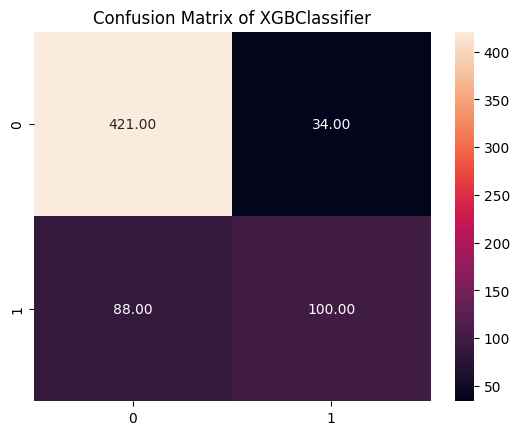

In [ ]:
sns.heatmap(conf_matrix_xgb,annot=True,fmt=".2f")
plt.title("Confusion Matrix of XGBClassifier")
plt.show()

In [ ]:
# False Positive Rate (FPR)
fpr_xgb = conf_matrix_xgb[0, 1] / (conf_matrix_xgb[0, 1] + conf_matrix_xgb[0, 0])

# False Negative Rate (FNR)
fnr_xgb = conf_matrix_xgb[1, 0] / (conf_matrix_xgb[1, 0] + conf_matrix_xgb[1, 1])

# F1 Score
f1_xgb = f1_score(y_test, y_pred_xgb)

# Recall Score
recall_xgb = recall_score(y_test, y_pred_xgb)

print(f"False Positive Rate (FPR) for XGBClassifier: {fpr_xgb:.4f}")
print(f"False Negative Rate (FNR) for XGBClassifier: {fnr_xgb:.4f}")
print(f"F1 Score for XGBClassifier: {f1_xgb:.4f}")
print(f"Recall Score for XGBClassifier: {recall_xgb:.4f}")

False Positive Rate (FPR) for XGBClassifier: 0.0747
False Negative Rate (FNR) for XGBClassifier: 0.4681
F1 Score for XGBClassifier: 0.6211
Recall Score for XGBClassifier: 0.5319
